# Fashion MNIST Project

In [5]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [6]:
pip install seaborn

In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [23]:
(trainX,trainY), (testX,testY) = fashion_mnist.load_data()

In [24]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\yasmi\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [25]:
train_images.shape

(60000, 28, 28, 1)

In [13]:
class_names = ['pants', 'sneakers','coat','shirt']

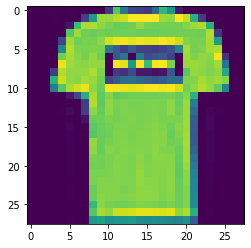

In [26]:
plt.imshow(trainX[1].reshape((28,28)))
plt.show()

# Logistic Regression Model

In [28]:
trainX = train_images.reshape((60000, 28, 28, 1))
testX = test_images.reshape((10000, 28, 28, 1))

The pixel values for the images lie between 0 to 255 now, which is a large range.

Let us normalize these values to a range from 0 to 1. To do this, we can simply divide each pixel value with 255

In [18]:
train_images_norm = trainX / 255.0

In [29]:
test_images_norm = testX / 255.0

In [32]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [36]:
image_train = trainX.reshape(60000,784)
image_test = testX.reshape(10000,784)

In [41]:
X_train = pd.DataFrame(image_train)
Y_train = trainY
X_test = pd.DataFrame(image_test)
Y_test = testY
print(Y_train)
X_train

[9 0 0 ... 3 0 5]


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=1500)
logReg.fit(X_train,Y_train)

In [ ]:
prediction_test  = logReg.predict(X_test)
prediction_train = logReg.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

In [ ]:
print(accuracy_score(Y_train, prediction_train))

In [ ]:
print(accuracy_score(Y_test, prediction_test))

# XGBoost Model

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=300, n_jobs=-1, seed=0)
xgb_clf.fit(X_train,Y_train)

In [ ]:
y_pred = xgb_clf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

In [ ]:
start = time.time()
xgb_clf = XGBClassifier(n_estimators=500, n_jobs=-1, learning_rate=0.5, seed=0)
xgb_clf.fit(x_train,y_train)
stop = time.time()
print(xgb_clf.get_params)
print(f"Training time: {stop - start}s")

In [ ]:
y_pred = xgb_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))